## Logistic Regression

In this part of the exercise, we will build a logistic regression model to predict whether a student gets admitted into a university.

Suppose that you are the administrator of a university department and
you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision. Our task is to build a classification model that estimates an applicant's probability based on the scores from those two exams.

###  Visualizing the data

Before starting to implement any learning algorithm, it is always good to visualize the data if possible. 

Plotting the data with + indicating (y=1) examples and o indicating (y=0) examples.


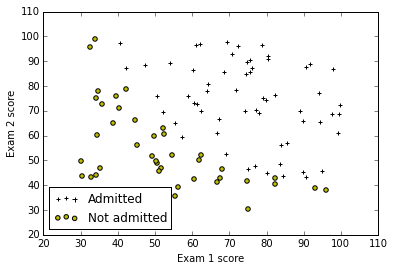

In [291]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin

# Load data
# The first two columns contains the exam scores and the third column contains the label.
data = np.loadtxt("data/ex2data1.txt",delimiter=",")
X = data[:,:2]
y = data[:,2]

print "Plotting the data with + indicating (y=1) examples and o indicating (y=0) examples."

def plotData(X,y,reg=False):
    '''Plots the data points with + for the positive examples and o for the negative examples.
    X is assumed to be a Mx2 matrix.'''
    # Find indices of positive and negative examples
    pos = np.where(y==1)[0]
    neg = np.where(y==0)[0]
    
    # Plot examples
    if (reg):
        plt.scatter(X[pos,0],X[pos,1],c='black',label='y=1',marker='+')
        plt.scatter(X[neg,0],X[neg,1],c='y',label='y=0')
        plt.xlabel("Microchip test 1")
        plt.ylabel("Microchip test 2")
    else:
        plt.scatter(X[pos,0],X[pos,1],c='black',label='Admitted',marker='+')
        plt.scatter(X[neg,0],X[neg,1],c='y',label='Not admitted')
        plt.xlabel("Exam 1 score")
        plt.ylabel("Exam 2 score")
    

plotData(X,y)
plt.legend(loc="lower left")

### Implementation

#### Warmup exercise: sigmoid function

Before we start with the actual cost function, recall that the logistic regression hypothesis is define as:

<center>$h_\theta(x) = g(\theta^Tx)$</center>

where function $g$ is the sigmoid function. The sigmoid function is defined as:

<center>$g(z) = \frac{1}{1 + e^{-z}}$</center>

Our first step is to implement the function ```sigmoid``` so that it can be called by the rest of the program.

In [292]:
def sigmoid(z):
    '''Computes the sigmoid of z'''
    g = np.reciprocal(1+np.exp(-z))
    
    return g

#### Cost function and gradient

Now we will implement the cost function and gradient for logistic regression. Recall that the cost function in logistic regression is

<center>$J(\theta) = \frac{1}{m} \sum_{i=1}^m [-y^{(i)}log(h_\theta(x^{(i)})) - (1-y^{(i)})log(1-h_\theta(x^{(i)})]$</center>

and the gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$ element (for $j=0,1,...,n$) is defined as follows:

<center>$\frac{\delta J(\theta)}{\delta\theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}$</center>

Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_\theta(x)$.

In [293]:
def costFunction(theta,X,y):
    '''Computes the cost of using theta as the parameter for logistic regression and the
    graident of the cost with respect to the parameters.'''
    h = sigmoid(np.dot(X,theta))
    
    J = (-np.dot(y.T,np.log(h)) - np.dot((1-y).T,np.log(1-h)))/m
    
    grad = np.dot(X.T,h-y)/m
    
    return (J,grad)

def computeCost(theta,X,y):
    '''Computes the cost of using theta as the parameter for logistic regression.(Copy for fmin)'''
    h = sigmoid(np.dot(X,theta))
    
    J = (-np.dot(y.T,np.log(h)) - np.dot((1-y).T,np.log(1-h)))/m
    
    return J

# Setup the data matrix appropriately and add ones for the intercept term
m, n = np.shape(X)

X = np.column_stack((np.ones((m,1)),X))
y = np.reshape(y,(m,1))

# Initialize fitting parameters
initial_theta = np.zeros((n+1,1))

# Compute and display initial cost and gradient
cost, grad = costFunction(initial_theta,X,y)

print("Cost at initial theta: %f"%np.asscalar(cost))
print("Gradient at initial theta (zeros):")
print grad

Cost at initial theta: 0.693147
Gradient at initial theta (zeros):
[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


#### Learning parameters using ```fmin```

In [294]:
# Run fmin to obtain the optimal theta
result = fmin(computeCost,x0=initial_theta,args=(X,y),maxiter=400,full_output=True)

# Print theta to screen
print("Cost at theta found by fmin: %f"% result[1])
print("Theta: ")
print result[0]

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287
Cost at theta found by fmin: 0.203498
Theta: 
[-25.16130062   0.20623142   0.20147143]


[28.05882244669796, 101.82785779692128]
[ 96.16594241  20.65402948]


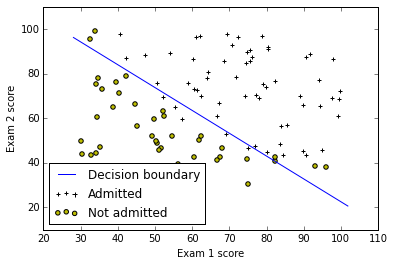

In [295]:
def plotDecisionBoundary(theta,X,y):
    '''Plots the data points X and y into a new figure with the decision boundary defined by theta'''
    plotData(X[:,[1,2]],y)
    plt.hold(True)
    
    if X.shape[1] <= 3:
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = [min(X[:,1])-2,max(X[:,1])+2]
        
        # Calculate the decision boundary line
        plot_y = np.dot(-np.reciprocal(theta[2]),np.dot(theta[1],plot_x)+ theta[0]) 
        
        plt.plot(plot_x,plot_y,label="Decision boundary")
        
        print plot_x
        print plot_y
    
    else:
        u = np.linspace(-1,1.5,50)
        v = np.linspace(-1,1.5,50)
        
        z = np.zeros((len(u),len(v)))
        
        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = np.dot(mapFeature(u[i],v[j]),theta)
        
        z = z.T
        
        plt.contour(u,v,z,[0],label="Decision boundary")
    

# Plot boundary
plotDecisionBoundary(result[0],X,y)
plt.legend(loc="lower left")

#### Evaluating logistic regression

After learning the parameters, you can use the model to predict whether a particular student will be admitted.

In [296]:
prob = sigmoid(np.dot([1, 45, 85],result[0]))

print("For a student with scores 45 and 85, we predict an admission probability of %f"% prob)

def predict(theta,X):
    '''Predict whether the label is 0 or 1 using learned regression parameters theta.
    Uses a threshold at 0.5 (i.e. if sigmoid(theta.T*x) >= 0.5, predict 1)'''
    
    m = X.shape[0]
    
    p = np.zeros((m,1))
    
    p = sigmoid(np.dot(X,theta)) >= 0.5
    
    return p

# Compute accuracy on our training set

p = np.reshape(1*predict(result[0],X),y.shape)

print("Training accuracy: %f"%(mean(1*(p==y))*100))

For a student with scores 45 and 85, we predict an admission probability of 0.776292
Training accuracy: 89.000000


## Regularized logistic regression

In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure that it is functioning correctly.

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which we can build a logistic regression model.

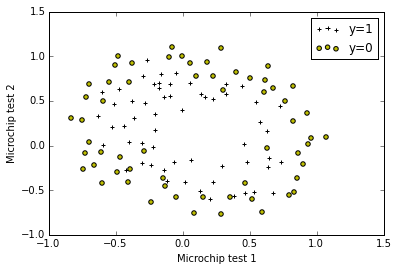

In [297]:
# Load data
data = np.loadtxt("data/ex2data2.txt",delimiter=",")
X = data[:,:2]
y = data[:,2]

plotData(X,y,reg=True)
plt.legend()

The above figure shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straightforward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.

### Feature mapping

One way to fit the data better is to create more features from each data point. In the function ```mapFeature```, we will map the features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power.

As a result of this mapping, our vector of two features (the scores on two QA tests) have been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear non linear when drawn in our 2-dimensional plot.

While the feature mapping allows us to build a more expressive classifier, it is also more susceptible to overfitting. In the next parts of the exercise, we will implement regularized logistic regression to fit the data and also see for ourselves how regularization can help combat the overfitting problem.

In [298]:
def mapFeature(X1,X2):
    '''Feature mapping function to polynomial features'''
    degree = 6
    
    out = np.ones((X1.shape))
    
    for i in range(1,degree+1):
        for j in range(i+1):
            out = np.column_stack((out,X1**(i-j)*X2**(j)))
    
    return out
    
m,n = X.shape

# Add polynomial features
X = mapFeature(X[:,0].reshape((m,1)),X[:,1].reshape((m,1)))
y = y.reshape((m,1))

# Initialize fitting parameters
initial_theta = zeros((np.shape(X)[1],1))

## Cost function and gradient

Now we will implement code to compute the cost function and gradient for regularized logistic regression. 

Recall that the regularized cost function in logistic regression is:

<center>$J(\theta) = \frac{1}{m} \sum_{i=1}^m [-y^{(i)}log(h_\theta(x^{(i)})) - (1-y^{(i)})log(1-h_\theta(x^{(i)})] + \frac{\lambda}{2m} \sum_{j=1}^{m}\theta_j^2$</center>

The gradient of the cost function is a vector where the $j^{th}$ element is defined as follows.

<center>$\frac{\delta J(\theta)}{\delta\theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}$ for $j=0$</center>

<center>$(\frac{\delta J(\theta)}{\delta\theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}) + \frac{\lambda}{m} \theta_j$ for $j\geq1$</center>


In [299]:
def costFunctionReg(theta,X,y,lamda):
    '''Compute cost and gradient for logistic regression using theta as the parameters with regularization and 
    gradient of the cost w.r.t. the parameters'''
    grad = np.zeros(theta.shape)
    
    h = sigmoid(np.dot(X,theta))
    
    J = (-np.dot(y.T,np.log(h)) - np.dot((1-y).T,np.log(1-h)))/m + (lamda*np.dot(theta[1:].T,theta[1:]))/(2*m)
    
    grad[0] = np.dot(X[:,[0]].T,h-y)/m
    
    grad[1:] = np.dot(X[:,1:].T,h-y)/m + (lamda * theta[1:])/m
    
    return J,grad

def computeCostReg(theta,X,y,lamda):
    '''Compute cost for logistic regression using theta as the parameters with regularization (copy for fmin)'''
    h = sigmoid(np.dot(X,theta))
    
    J = (-np.dot(y.T,np.log(h)) - np.dot((1-y).T,np.log(1-h)))/m + (lamda*np.dot(theta[1:].T,theta[1:]))/(2*m)
    
    return J

# Set regularization parameter lamda to 1
lamda = 1

cost, grad = costFunctionReg(initial_theta,X,y,lamda)

print("Cost at initial theta: %f"%cost)

Cost at initial theta: 0.693147


#### Learning parameters using ```fmin```

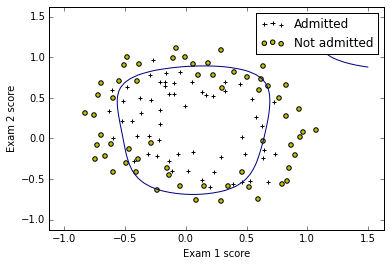

In [303]:
# Run fmin to obtain the optimal theta
result = fmin(computeCostReg,x0=initial_theta,args=(X,y,lamda),full_output=True)

# Plot boundary
plotDecisionBoundary(result[0],X,y)
plt.legend()

In [304]:
# Compute accuracy on our training set
p = np.reshape(1*predict(result[0],X),y.shape)

print("Training accuracy: %f"%(mean(1*(p==y))*100))

Training accuracy: 75.423729
